<a href="https://colab.research.google.com/github/bborisggg/hw_econometrics/blob/main/SVAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf hw_econometrics

In [2]:
!git clone https://github.com/bborisggg/hw_econometrics

Cloning into 'hw_econometrics'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 83 (delta 27), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (83/83), 909.30 KiB | 3.43 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [8]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.svar_model import SVAR

import matplotlib.pyplot as plt
from matplotlib import gridspec

В данном коде мы непосредственно реализуем модель SVAR для собранных данных

Опираемся на одну из возможных спецификаций модели:

https://doi.org/10.1108/IJOEM-10-2018-0551

$$X_t = (\Delta oilp_t ; ygap_t ; \Delta ms_t ; \Delta ir_t ; \Delta er_t; \Delta cpi_t)'$$

In [4]:
df = pd.read_excel('hw_econometrics/data.xlsx')

In [6]:
df = df.set_index('date')
df.index = pd.PeriodIndex(df.index, freq='M')

In [7]:
df

,d_oilp,y_gap,d_ms,d_ir,d_er,d_cpi
date,,,,,,
2000-09,0.092899,0.001099,0.037412,-1.27,0.002190,0.018952
2000-10,-0.068045,-0.002158,0.041039,1.79,0.002564,0.021227
2000-11,0.050081,-0.000469,0.018707,2.97,-0.002258,0.012612
2000-12,-0.237844,0.011316,0.043171,0.50,0.006180,0.013533
2001-01,-0.001560,-0.004713,0.025340,-3.21,0.013767,0.014045
...,...,...,...,...,...,...
2023-05,-0.114672,0.008288,0.005140,0.09,-0.022259,0.004485
2023-06,-0.008383,0.008727,0.022239,0.08,0.050545,0.006295
2023-07,0.068048,0.011550,0.013514,0.50,0.082382,0.008854


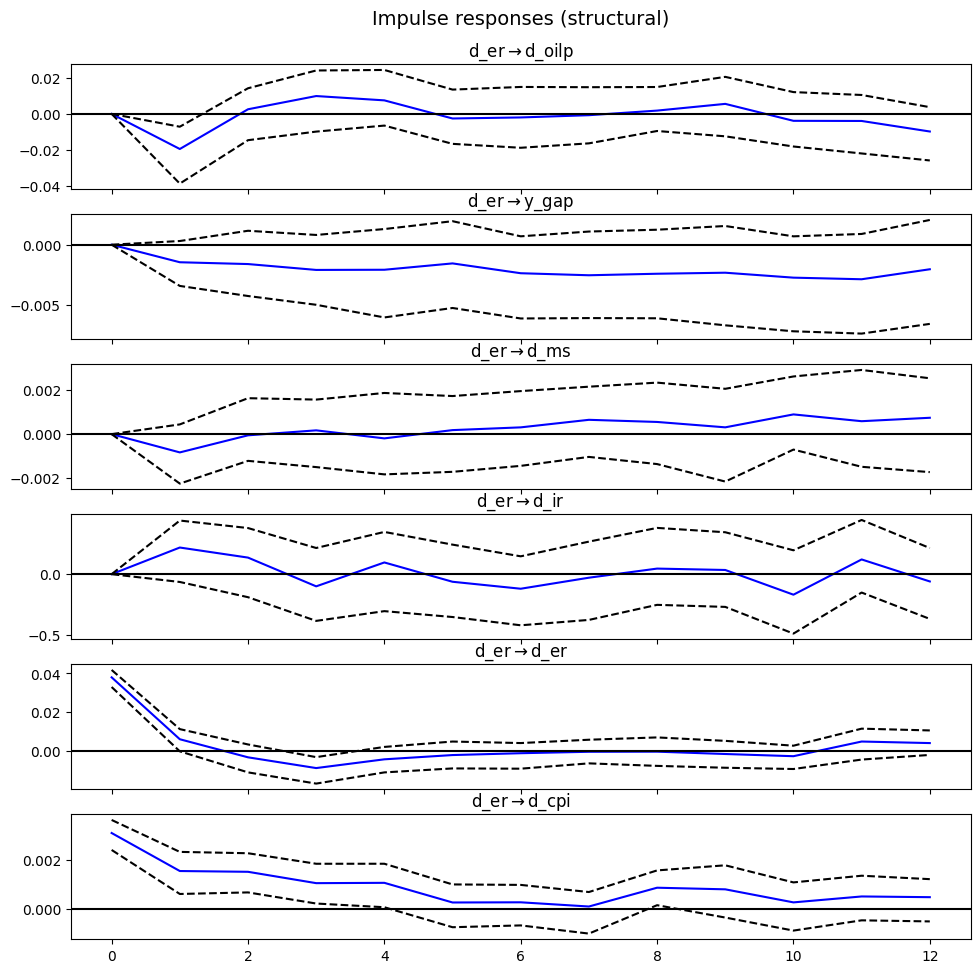

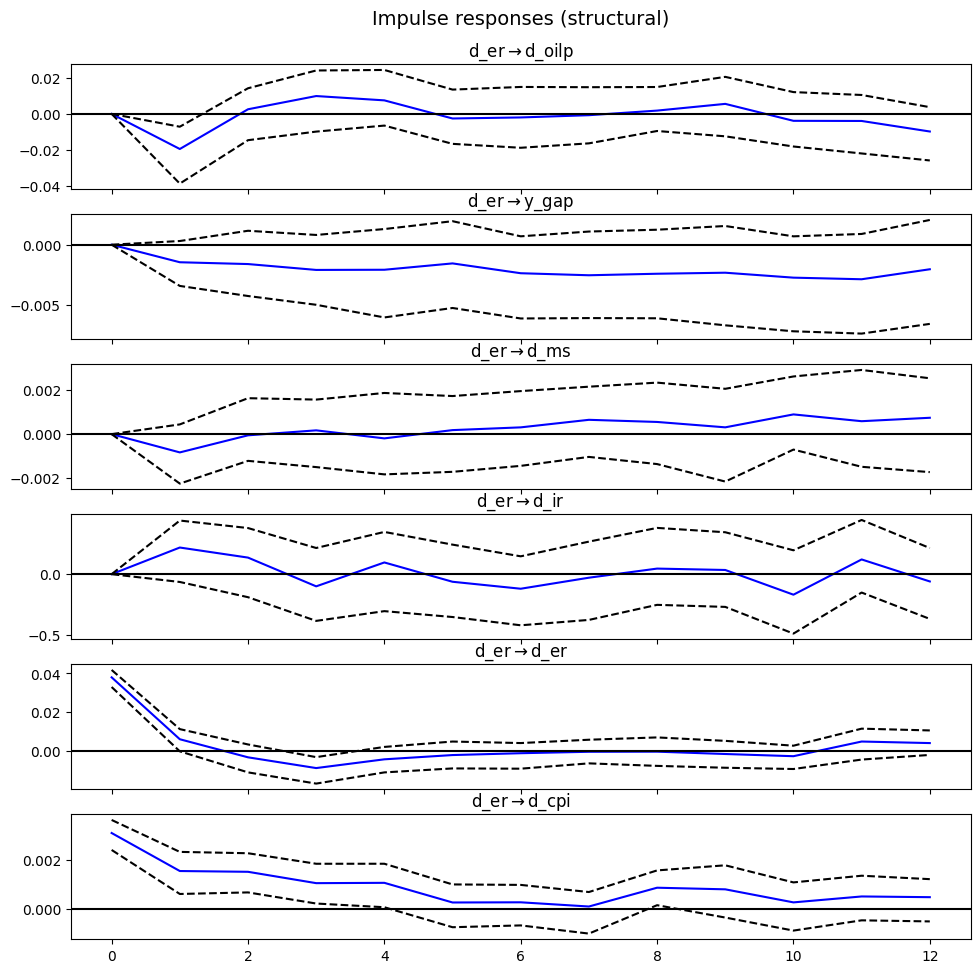

In [30]:
import warnings
warnings.filterwarnings('ignore')
B = np.asarray([
                ['E', 0, 0, 0, 0, 0],
                ['E', 'E', 0, 0, 0, 0],
                ['E', 'E', 'E', 0, 0, 0],
                ['E', 'E', 'E', 'E', 0, 0],
                ['E', 'E', 'E', 'E', 'E', 0],
                ['E', 'E', 'E', 'E', 'E', 'E']]
               )
mymodel = SVAR(df, svar_type='B', B=B, freq='M')
res = mymodel.fit(maxlags=12, maxiter=10000, maxfun=10000, solver='bfgs')
res.irf(periods=12).plot(impulse='d_er', plot_stderr=True,
                         stderr_type='mc', repl=100)